In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [29]:
!pip install citipy

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 12 | xingcheng
Processing Record 2 of Set 12 | busselton
Processing Record 3 of Set 12 | cape town
Processing Record 4 of Set 12 | arraial do cabo
Processing Record 5 of Set 12 | oistins
Processing Record 6 of Set 12 | clyde river
Processing Record 7 of Set 12 | vaini
Processing Record 8 of Set 12 | maltahohe
Processing Record 9 of Set 12 | bethel
Processing Record 10 of Set 12 | avarua
Processing Record 11 of Set 12 | hobart
Processing Record 12 of Set 12 | hilo
Processing Record 13 of Set 12 | saint-philippe
Processing Record 14 of Set 12 | nikolskoye
Processing Record 15 of Set 12 | coahuayana
Processing Record 16 of Set 12 | ancud
Processing Record 17 of Set 12 | new norfolk
Processing Record 18 of Set 12 | port alfred
Processing Record 19 of Set 12 | rikitea
Processing Record 20 of Set 12 | pisco
Processing Record 21 of Set 12 | naze
Processing Record 22 of Set 12 | port lincoln
Processing Record 23 of Set 12 | taolanaro
Processing Record 24 of Set 12 | 

In [16]:
# Run an API request for each of the cities.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1  
    
    
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 50 of Set 34 | xingcheng
Processing Record 51 of Set 34 | busselton
Processing Record 52 of Set 34 | cape town
Processing Record 53 of Set 34 | arraial do cabo
Processing Record 54 of Set 34 | oistins
Processing Record 55 of Set 34 | clyde river
Processing Record 56 of Set 34 | vaini
Processing Record 57 of Set 34 | maltahohe
Processing Record 58 of Set 34 | bethel
Processing Record 59 of Set 34 | avarua
Processing Record 60 of Set 34 | hobart
Processing Record 61 of Set 34 | hilo
Processing Record 62 of Set 34 | saint-philippe
Processing Record 63 of Set 34 | nikolskoye
Processing Record 64 of Set 34 | coahuayana
Processing Record 65 of Set 34 | ancud
Processing Record 66 of Set 34 | new norfolk
Processing Record 67 of Set 34 | port alfred
Processing Record 68 of Set 34 | rikitea
Processing Record 69 of Set 34 | pisco
Processing Record 70 of Set 34 | naze
Processing Record 71 of Set 34 | port lincoln
Processing Record 72 of Set 34 | taolanaro
City not found. Skipping

Processing Record 35 of Set 37 | kenai
Processing Record 36 of Set 37 | lakes entrance
Processing Record 37 of Set 37 | santa maria
Processing Record 38 of Set 37 | vallenar
Processing Record 39 of Set 37 | paracuru
Processing Record 40 of Set 37 | kursenai
Processing Record 41 of Set 37 | nara
Processing Record 42 of Set 37 | enid
Processing Record 43 of Set 37 | saint-pierre
Processing Record 44 of Set 37 | upata
Processing Record 45 of Set 37 | kindu
Processing Record 46 of Set 37 | berdigestyakh
Processing Record 47 of Set 37 | tacoronte
Processing Record 48 of Set 37 | taltal
Processing Record 49 of Set 37 | kodiak
Processing Record 50 of Set 37 | irtyshskiy
Processing Record 1 of Set 38 | saraland
Processing Record 2 of Set 38 | askiz
Processing Record 3 of Set 38 | tripoli
Processing Record 4 of Set 38 | yefremov
Processing Record 5 of Set 38 | atar
Processing Record 6 of Set 38 | liverpool
Processing Record 7 of Set 38 | belushya guba
City not found. Skipping...
Processing Reco

Processing Record 24 of Set 41 | a
City not found. Skipping...
Processing Record 25 of Set 41 | chervone
Processing Record 26 of Set 41 | sao sebastiao
Processing Record 27 of Set 41 | halalo
City not found. Skipping...
Processing Record 28 of Set 41 | ligayan
Processing Record 29 of Set 41 | haines junction
Processing Record 30 of Set 41 | sri aman
Processing Record 31 of Set 41 | vila velha
Processing Record 32 of Set 41 | fare
Processing Record 33 of Set 41 | qasigiannguit
Processing Record 34 of Set 41 | juba
Processing Record 35 of Set 41 | peterongan
Processing Record 36 of Set 41 | buala
Processing Record 37 of Set 41 | raudeberg
Processing Record 38 of Set 41 | zima
Processing Record 39 of Set 41 | jiujiang
Processing Record 40 of Set 41 | karauzyak
City not found. Skipping...
Processing Record 41 of Set 41 | san lorenzo
Processing Record 42 of Set 41 | itaqui
Processing Record 43 of Set 41 | leh
Processing Record 44 of Set 41 | bandarbeyla
Processing Record 45 of Set 41 | nome

Processing Record 9 of Set 45 | maua
Processing Record 10 of Set 45 | labutta
City not found. Skipping...
Processing Record 11 of Set 45 | kathmandu
Processing Record 12 of Set 45 | blyth
Processing Record 13 of Set 45 | ingham
Processing Record 14 of Set 45 | ladushkin
Processing Record 15 of Set 45 | caohai
Processing Record 16 of Set 45 | karkaralinsk
City not found. Skipping...
Processing Record 17 of Set 45 | saint-augustin
Processing Record 18 of Set 45 | tsumeb
Processing Record 19 of Set 45 | pafos
Processing Record 20 of Set 45 | chilca
Processing Record 21 of Set 45 | whyalla
Processing Record 22 of Set 45 | kongolo
Processing Record 23 of Set 45 | rondonopolis
Processing Record 24 of Set 45 | baicheng
Processing Record 25 of Set 45 | lumeje
Processing Record 26 of Set 45 | tucurui
Processing Record 27 of Set 45 | itzincab
City not found. Skipping...
Processing Record 28 of Set 45 | kanye
Processing Record 29 of Set 45 | kempsey
Processing Record 30 of Set 45 | santa cruz
Pro

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xingcheng,40.6167,120.7167,65.37,95,79,12.01,CN,2021-06-25 16:01:46
1,Busselton,-33.6500,115.3333,53.04,76,56,9.08,AU,2021-06-25 16:01:46
2,Cape Town,-33.9258,18.4232,60.89,79,12,5.01,ZA,2021-06-25 16:01:47
3,Arraial Do Cabo,-22.9661,-42.0278,73.44,72,48,21.90,BR,2021-06-25 16:01:47
4,Oistins,13.0667,-59.5333,86.09,62,40,18.41,BB,2021-06-25 15:59:09
5,Clyde River,70.4692,-68.5914,36.73,95,99,2.84,CA,2021-06-25 16:01:48
6,Vaini,-21.2000,-175.2000,72.03,67,100,24.81,TO,2021-06-25 16:01:48
7,Maltahohe,-24.8333,16.9833,64.33,19,1,11.81,NA,2021-06-25 16:01:49
8,Bethel,41.3712,-73.4140,73.71,81,90,3.44,US,2021-06-25 16:01:49
9,Avarua,-21.2078,-159.7750,75.67,86,100,17.43,CK,2021-06-25 16:01:50


In [18]:
titles = list(city_data_df.columns)
titles

['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed',
 'Country',
 'Date']

In [19]:
titles[1],titles[2],titles[3],titles[4],titles[5],titles[6],titles[7],titles[8]= titles[7],titles[8],titles[1],titles[2],titles[3],titles[4],titles[5],titles[6]
titles

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [20]:
city_data_df=city_data_df[titles]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Xingcheng,CN,2021-06-25 16:01:46,40.6167,120.7167,65.37,95,79,12.01
1,Busselton,AU,2021-06-25 16:01:46,-33.6500,115.3333,53.04,76,56,9.08
2,Cape Town,ZA,2021-06-25 16:01:47,-33.9258,18.4232,60.89,79,12,5.01
3,Arraial Do Cabo,BR,2021-06-25 16:01:47,-22.9661,-42.0278,73.44,72,48,21.90
4,Oistins,BB,2021-06-25 15:59:09,13.0667,-59.5333,86.09,62,40,18.41
...,...,...,...,...,...,...,...,...,...
1107,Salina,US,2021-06-25 16:05:37,38.8403,-97.6114,86.85,73,75,3.00
1108,Mexico,PH,2021-06-25 16:05:35,15.0646,120.7198,82.42,79,100,1.66
1109,Lago Da Pedra,BR,2021-06-25 16:05:37,-4.3333,-45.1667,87.93,51,3,5.91
1110,Colon,PA,2021-06-25 16:04:07,9.3592,-79.9014,88.25,80,95,3.00


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

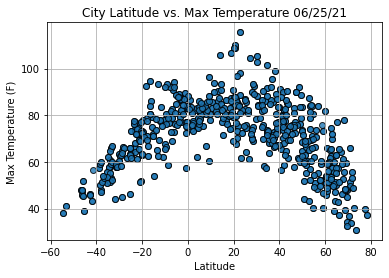

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

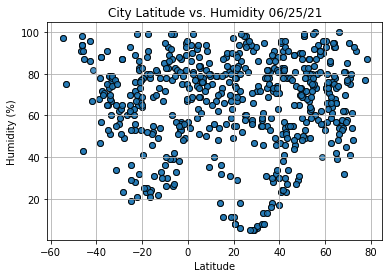

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

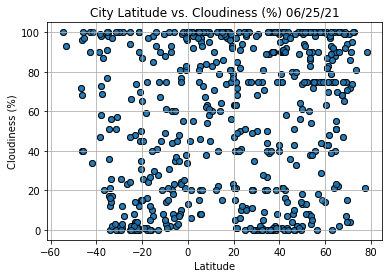

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

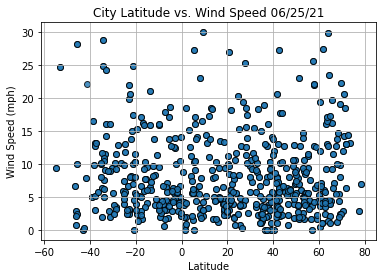

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [27]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Xingcheng,CN,2021-06-25 16:01:46,40.6167,120.7167,65.37,95,79,12.01
4,Oistins,BB,2021-06-25 15:59:09,13.0667,-59.5333,86.09,62,40,18.41
5,Clyde River,CA,2021-06-25 16:01:48,70.4692,-68.5914,36.73,95,99,2.84
8,Bethel,US,2021-06-25 16:01:49,41.3712,-73.4140,73.71,81,90,3.44
11,Hilo,US,2021-06-25 16:00:08,19.7297,-155.0900,79.29,83,79,2.24


In [29]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Busselton,AU,2021-06-25 16:01:46,-33.6500,115.3333,53.04,76,56,9.08
2,Cape Town,ZA,2021-06-25 16:01:47,-33.9258,18.4232,60.89,79,12,5.01
3,Arraial Do Cabo,BR,2021-06-25 16:01:47,-22.9661,-42.0278,73.44,72,48,21.90
6,Vaini,TO,2021-06-25 16:01:48,-21.2000,-175.2000,72.03,67,100,24.81
7,Maltahohe,NA,2021-06-25 16:01:49,-24.8333,16.9833,64.33,19,1,11.81


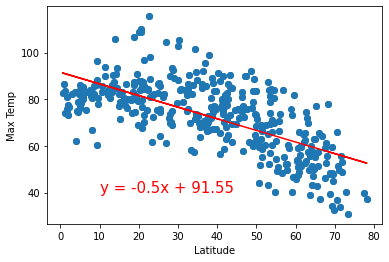

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

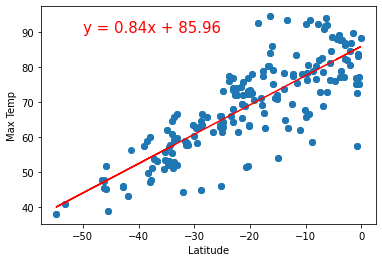

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

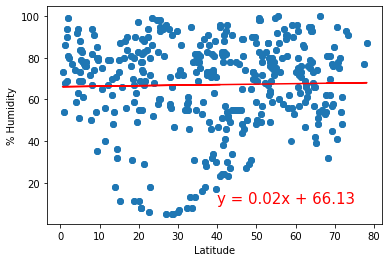

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

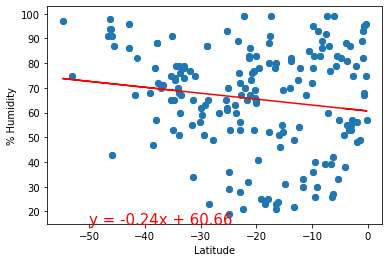

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

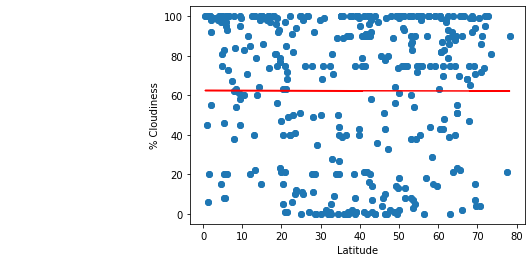

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

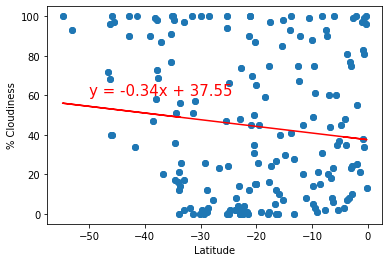

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

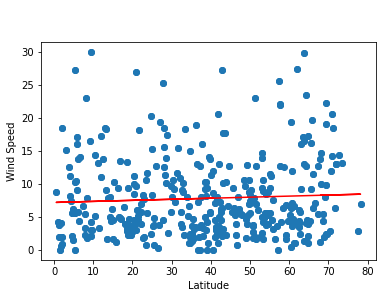

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

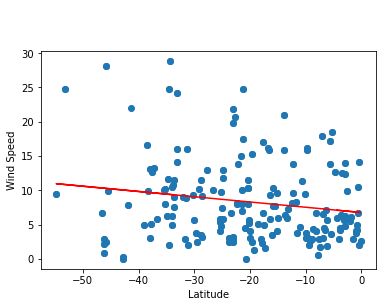

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))